In [208]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn
from six import StringIO
from sklearn.model_selection import train_test_split, KFold

In [209]:
# Definindo alguns parâmetros 

# atributos do dataset que serão usados
attributes = ['cap_shape','cap_surface','cap_color','bruises','odor',
         'gill_spacing','gill_size','gill_color',
         'stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
         'stalk_color_above_ring','stalk_color_below_ring','veil_color',
         'ring_number','ring_type','spore_print_color','population','habitat']

# função de seleção do classificador
clf_function = "entropy"

# número de divisões do K-fold
kf_splits = 5

##Legenda dos atributos da tabela

cap_shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap_surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap_color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill_attachment: attached=a,descending=d,free=f,notched=n

gill_spacing: close=c,crowded=w,distant=d

gill_size: broad=b,narrow=n

gill_color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk_shape: enlarging=e,tapering=t

stalk_root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk_surface_above_ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk_surface_below_ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk_color_above_ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk_color_below_ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil_type: partial=p,universal=u

veil_color: brown=n,orange=o,white=w,yellow=y

ring_number: none=n,one=o,two=t

ring_type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore_print_color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [210]:
# nomes dos atributos
col_nomes = ['classe','cap_shape','cap_surface','cap_color','bruises','odor',
           'gill_attachment','gill_spacing','gill_size','gill_color',
           'stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
           'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
           'ring_number','ring_type','spore_print_color','population','habitat']


# carregando a base de dados a ser usada
df = pd.read_csv("mushrooms_data.csv", header=None, names=col_nomes)


| Atributo | tipos do atributo |
| :------: | :---------------: |
| cap_shape | 6 |
| cap_surface | 4 |
| cap_color | 10 |
| bruises | 2 |
| odor | 9 |
| gill_attachment | 1 -> False (podemos eliminar esse atributo) |
| gill_spacing | 2 |
| gill_size | 2 |
| gill_color | 12 |
| stalk_shape | 2 |
| stalk_root | 5 |
| stalk_surface_above_ring | 4 |
| stalk_surface_below_ring | 4 |
| stalk_color_above_ring | 9 |
| stalk_color_below_ring | 9 |
| veil_type | 1 -> p (podemos eliminar esse atributo) |
| veil_color | 4 |
| ring_number | 3 |
| ring_type | 5 |
| spore_print_color | 9 |
| population | 6 |
| habitat | 7 |

numero total de atributos criados na árvore = 114

Número total de instâncias possíveis =  60,949,905,408,000

In [211]:
#X_cols = ['cap_shape','cap_surface','cap_color','bruises','odor',
#         'gill_attachment','gill_spacing','gill_size','gill_color',
#         'stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
#         'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
#         'ring_number','ring_type','spore_print_color','population','habitat']

# abstraindo alguns atributos
X_cols = attributes

X = df[X_cols]   # atributos que serão usados
y = df.classe    # conceito a ser aprendido

In [212]:
# convertendo atributos categóricos em 0 e 1
X_dummie = pd.get_dummies(X[X_cols]) #transformando o dataset
X_dummie.head()

,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,cap_surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Escolheremos o tipo de divisão que será aplicada ao dataset, a fim de obtermos o conjunto de teste e treinamento. Usaremos o método K-fold.

In [213]:
kf = KFold(n_splits=kf_splits)

Vamos criar agora o nosso classificador de árvore de decisão. Estaremos usando a entropia como função para seleção do atributo:

In [214]:
# Criação do classificador de árvore de decisão 
clf = DecisionTreeClassifier(criterion=clf_function)

# Executando todos os Folds ------------------------
div = 0

# guarda cada uma das acurácias
train_fold = [] 
test_fold = []

# guarda o somatório das acurácias
train_sum = 0 
test_sum = 0

# guarda cada uma das precisões
train_fold_prec = [] 
test_fold_prec = []

# guarda o somatório das precisões
train_sum_prec = 0 
test_sum_prec = 0

X_train, X_test = [],[]
y_train, y_test = [],[]

for train_index, test_index in kf.split(X_dummie):
  div+=1

  # dividindo os conjuntos de teste e treino
  X_train, X_test = X_dummie.iloc[train_index], X_dummie.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
  clf = clf.fit(X_train, y_train)
  
  # obtendo as previsões
  y_pred_train = clf.predict(X_train) 
  y_pred_test = clf.predict(X_test)

  # valores de acurácia
  acc_train = metrics.accuracy_score(y_train, y_pred_train)
  acc_test = metrics.accuracy_score(y_test, y_pred_test)

  # calculando média de acurácia de treino e teste
  train_sum += acc_train
  test_sum += acc_test

  # adiciona a acurácia à lista
  train_fold.append(acc_train)
  test_fold.append(acc_test)

  # valores de precisão
  prec_train = metrics.precision_score(y_train, y_pred_train, average='macro')
  prec_test = metrics.precision_score(y_test.to_numpy(), y_pred_test, average='macro')

  # calculando média de precisão de treino e teste
  train_sum_prec += prec_train
  test_sum_prec += prec_test

  # adiciona a precisão à lista
  train_fold_prec.append(prec_train)
  test_fold_prec.append(prec_test)

# Podemos medir a acurácia e precisão, testando quantas instâncias são classificadas corretamente.

In [215]:
print("Individual train accuracy:", train_fold)
print("Individual test accuracy:", test_fold)
print()
print("Average train accuracy:", train_sum/div)
print("Average test accuracy:", test_sum/div)
print()
print("Individual train precision:", train_fold_prec)
print("Individual test precision:", test_fold_prec)
print()
print("Average train precision:", train_sum_prec/div)
print("Average test precision:", test_sum_prec/div)

Individual train accuracy: [1.0, 1.0, 1.0, 1.0, 1.0]
Individual test accuracy: [1.0, 1.0, 1.0, 0.9926153846153846, 0.9901477832512315]

Average train accuracy: 1.0
Average test accuracy: 0.9965526335733232

Individual train precision: [1.0, 1.0, 1.0, 1.0, 1.0]
Individual test precision: [1.0, 1.0, 1.0, 0.9955914768552535, 0.9929390997352162]

Average train precision: 1.0
Average test precision: 0.997706115318094


# Podemos também gerar uma matriz com falsos positivos e falsos negativos (confusion matrix) 

In [216]:
confusion = metrics.confusion_matrix(y_test, y_pred_test, labels=['e','p'])

df = pd.DataFrame(confusion,
                  index=pd.Index(['Real edible', 'Real poisonous']),
                  columns=pd.Index(['Predicted edible', 'Predicted poisonous']))
df.style

,Predicted edible,Predicted poisonous
Real edible,491,16
Real poisonous,0,1117


Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:

https://graphviz.org/

https://pypi.org/project/graphviz/

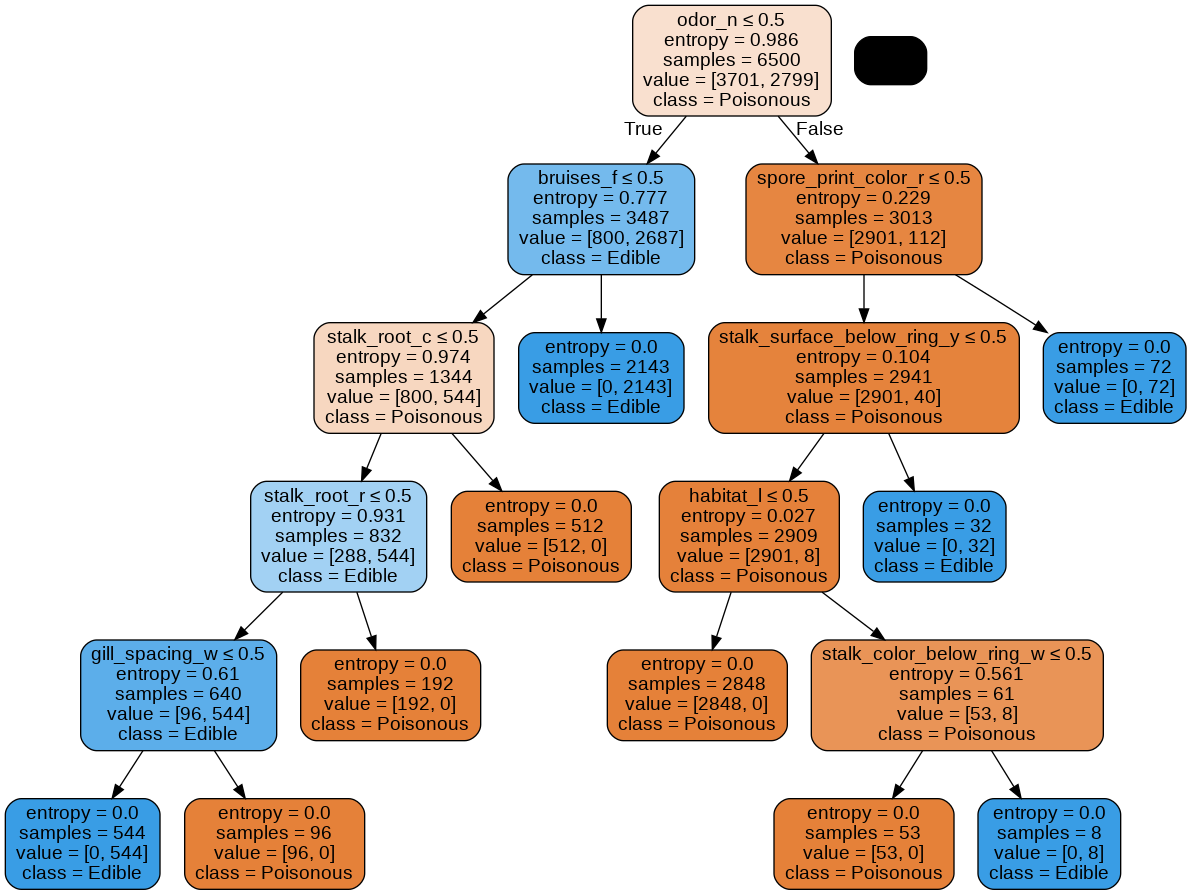

In [217]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names = X_dummie.columns,class_names=['Poisonous','Edible'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

# Visualizando a importância dos atributos:

In [218]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# importância (train set)
importance = permutation_importance(clf, X_dummie, y, n_repeats=10, random_state=1)

# organizando dados e eliminando atributos com importancia = 0
attributes_importances_mean = pd.Series(importance.importances_mean, index=X_dummie.columns)
attributes_importances_std = pd.Series(importance.importances_std, index=X_dummie.columns)

mean = attributes_importances_mean.iloc[(attributes_importances_mean != 0.0).values]
std = attributes_importances_std.iloc[(attributes_importances_mean != 0.0).values]

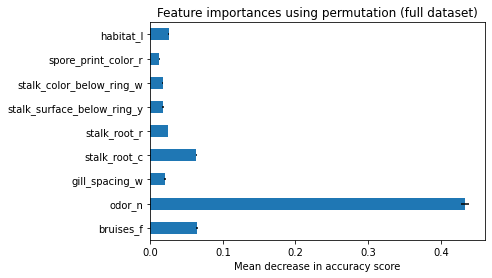

In [219]:
# plotando resultado das médias e desvio padrão
fig, ax = plt.subplots()
mean.plot.barh(xerr=std, ax=ax)
ax.set_title("Feature importances using permutation (full dataset)")
ax.set_xlabel("Mean decrease in accuracy score")
plt.show()

# analizando podas de profundidade na árvore

In [220]:
depth_count = []
accuracy_training = []
accuracy_testing = []
for depth in range(1,21):
  # Criação do classificador de árvore de decisão 
  clf = DecisionTreeClassifier(criterion=clf_function, max_depth=depth)

  # Executando todos os Folds ------------------------
  div = 0

  # guarda cada uma das acurácias
  train_fold = [] 
  test_fold = []

  # guarda o somatório das acurácias
  train_sum = 0 
  test_sum = 0

  # guarda cada uma das precisões
  train_fold_prec = [] 
  test_fold_prec = []

  # guarda o somatório das precisões
  train_sum_prec = 0 
  test_sum_prec = 0

  X_train, X_test = [],[]
  y_train, y_test = [],[]

  for train_index, test_index in kf.split(X_dummie):
    div+=1

    # dividindo os conjuntos de teste e treino
    X_train, X_test = X_dummie.iloc[train_index], X_dummie.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
    clf = clf.fit(X_train, y_train)
    
    # obtendo as previsões
    y_pred_train = clf.predict(X_train) 
    y_pred_test = clf.predict(X_test)

    # valores de acurácia
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    acc_test = metrics.accuracy_score(y_test, y_pred_test)

    # calculando média de acurácia de treino e teste
    train_sum += acc_train
    test_sum += acc_test

    # adiciona a acurácia à lista
    train_fold.append(acc_train)
    test_fold.append(acc_test)

    # valores de precisão
    prec_train = metrics.precision_score(y_train, y_pred_train, average='macro')
    prec_test = metrics.precision_score(y_test.to_numpy(), y_pred_test, average='macro')

    # calculando média de precisão de treino e teste
    train_sum_prec += prec_train
    test_sum_prec += prec_test

    # adiciona a precisão à lista
    train_fold_prec.append(prec_train)
    test_fold_prec.append(prec_test)
  
  depth_count.append(depth)
  accuracy_training.append(train_sum/div)
  accuracy_testing.append(test_sum/div)

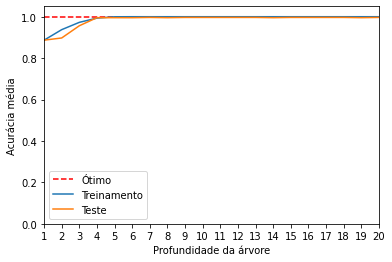

In [221]:
# plotando resultados
fig, ax = plt.subplots()
plt.axhline(y=1, color='r', linestyle='dashed', label="Ótimo")
plt.plot(depth_count, accuracy_training, label = "Treinamento")
plt.plot(depth_count, accuracy_testing, label = "Teste")
ax.set_ylabel("Acurácia média")
ax.set_xlabel("Profundidade da árvore")
plt.xlim([1, 20])
plt.ylim([0, 1.05])
plt.xticks(range(1, 21, 1))
plt.legend()
plt.show()

----------------------------------------------------
# Variação usando a função de avaliação 'gini'

In [222]:
clf_function = 'gini'

In [223]:
# Criação do classificador de árvore de decisão 
clf = DecisionTreeClassifier(criterion=clf_function)

# Executando todos os Folds ------------------------
div = 0

# guarda cada uma das acurácias
train_fold = [] 
test_fold = []

# guarda o somatório das acurácias
train_sum = 0 
test_sum = 0

# guarda cada uma das precisões
train_fold_prec = [] 
test_fold_prec = []

# guarda o somatório das precisões
train_sum_prec = 0 
test_sum_prec = 0

X_train, X_test = [],[]
y_train, y_test = [],[]

for train_index, test_index in kf.split(X_dummie):
  div+=1

  # dividindo os conjuntos de teste e treino
  X_train, X_test = X_dummie.iloc[train_index], X_dummie.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
  clf = clf.fit(X_train, y_train)
  
  # obtendo as previsões
  y_pred_train = clf.predict(X_train) 
  y_pred_test = clf.predict(X_test)

  # valores de acurácia
  acc_train = metrics.accuracy_score(y_train, y_pred_train)
  acc_test = metrics.accuracy_score(y_test, y_pred_test)

  # calculando média de acurácia de treino e teste
  train_sum += acc_train
  test_sum += acc_test

  # adiciona a acurácia à lista
  train_fold.append(acc_train)
  test_fold.append(acc_test)

  # valores de precisão
  prec_train = metrics.precision_score(y_train, y_pred_train, average='macro')
  prec_test = metrics.precision_score(y_test.to_numpy(), y_pred_test, average='macro')

  # calculando média de precisão de treino e teste
  train_sum_prec += prec_train
  test_sum_prec += prec_test

  # adiciona a precisão à lista
  train_fold_prec.append(prec_train)
  test_fold_prec.append(prec_test)

In [224]:
print("Individual train accuracy:", train_fold)
print("Individual test accuracy:", test_fold)
print()
print("Average train accuracy:", train_sum/div)
print("Average test accuracy:", test_sum/div)
print()
print("Individual train precision:", train_fold_prec)
print("Individual test precision:", test_fold_prec)
print()
print("Average train precision:", train_sum_prec/div)
print("Average test precision:", test_sum_prec/div)

Individual train accuracy: [1.0, 1.0, 1.0, 1.0, 1.0]
Individual test accuracy: [1.0, 1.0, 1.0, 1.0, 0.9901477832512315]

Average train accuracy: 1.0
Average test accuracy: 0.9980295566502463

Individual train precision: [1.0, 1.0, 1.0, 1.0, 1.0]
Individual test precision: [1.0, 1.0, 1.0, 1.0, 0.9929390997352162]

Average train precision: 1.0
Average test precision: 0.9985878199470433


In [225]:
confusion = metrics.confusion_matrix(y_test, y_pred_test, labels=['e','p'])

df = pd.DataFrame(confusion,
                  index=pd.Index(['Real edible', 'Real poisonous']),
                  columns=pd.Index(['Predicted edible', 'Predicted poisonous']))
df.style

,Predicted edible,Predicted poisonous
Real edible,491,16
Real poisonous,0,1117


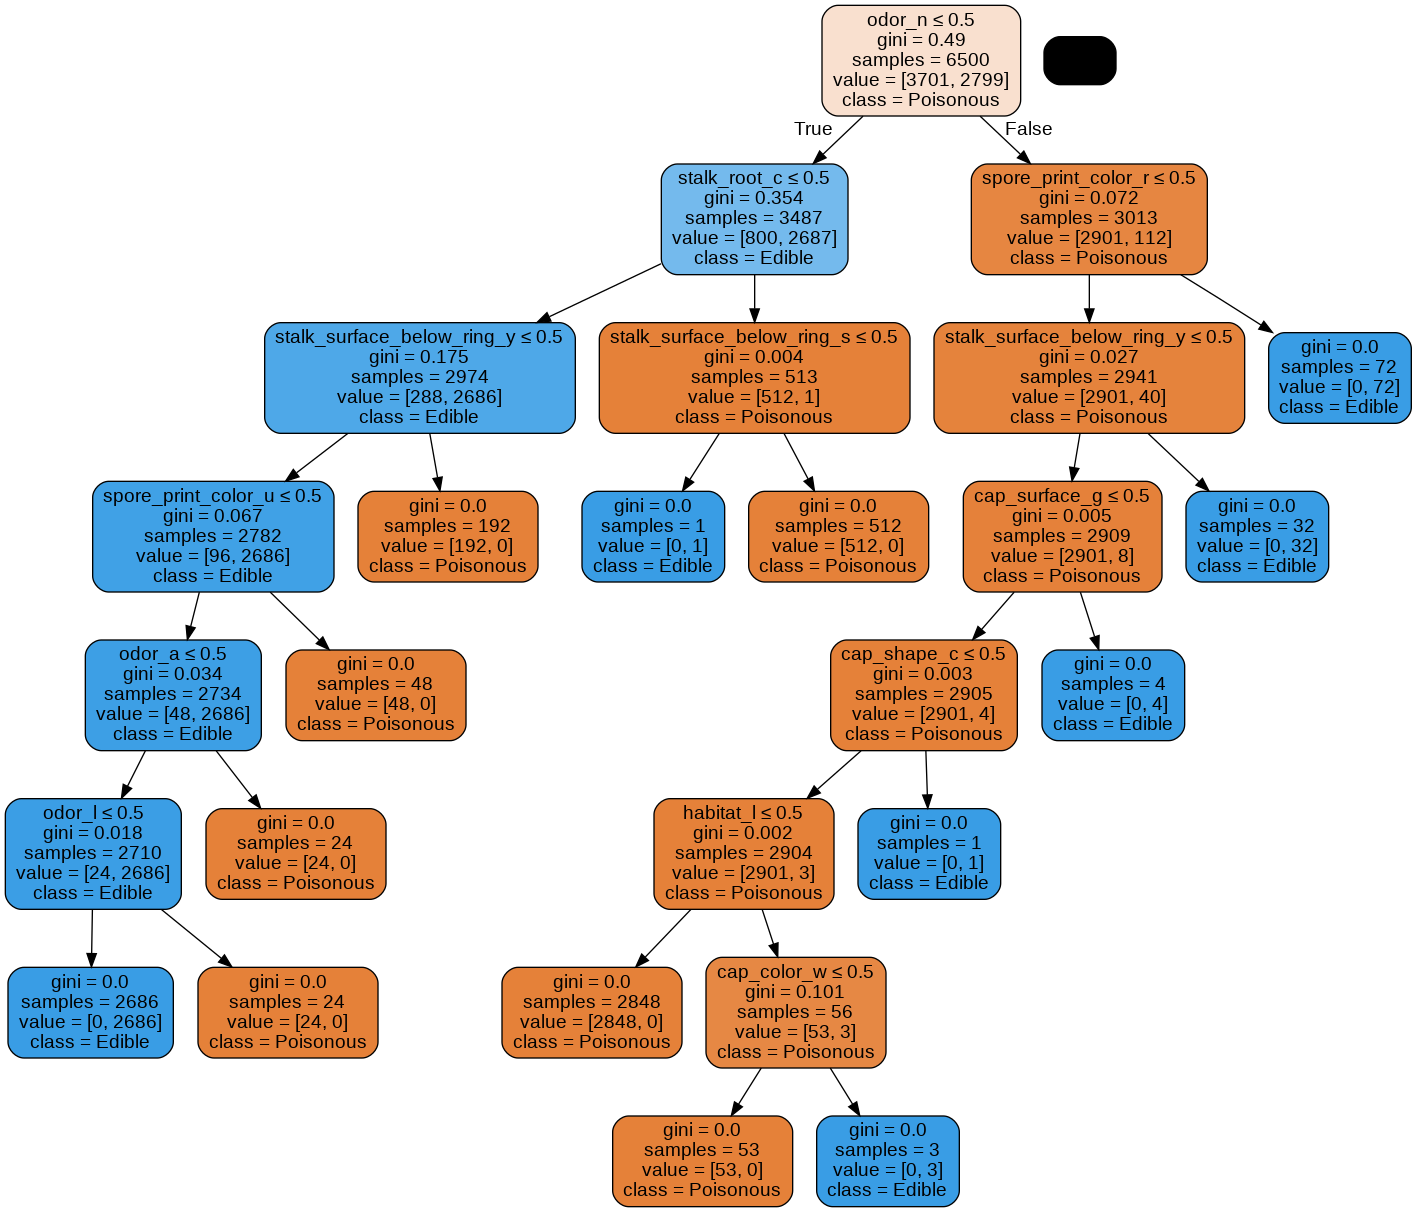

In [226]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names = X_dummie.columns,class_names=['Poisonous','Edible'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

In [227]:
# importância (train set)
importance = permutation_importance(clf, X_dummie, y, n_repeats=10, random_state=1)

# organizando dados e eliminando atributos com importancia = 0
attributes_importances_mean = pd.Series(importance.importances_mean, index=X_dummie.columns)
attributes_importances_std = pd.Series(importance.importances_std, index=X_dummie.columns)

mean = attributes_importances_mean.iloc[(attributes_importances_mean != 0.0).values]
std = attributes_importances_std.iloc[(attributes_importances_mean != 0.0).values]

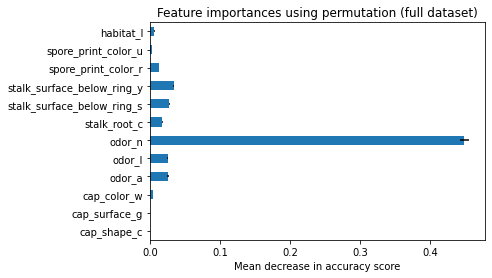

In [228]:
# plotando resultado das médias e desvio padrão
fig, ax = plt.subplots()
mean.plot.barh(xerr=std, ax=ax)
ax.set_title("Feature importances using permutation (full dataset)")
ax.set_xlabel("Mean decrease in accuracy score")
plt.show()

In [229]:
depth_count = []
accuracy_training = []
accuracy_testing = []
for depth in range(1,21):
  # Criação do classificador de árvore de decisão 
  clf = DecisionTreeClassifier(criterion=clf_function, max_depth=depth)

  # Executando todos os Folds ------------------------
  div = 0

  # guarda cada uma das acurácias
  train_fold = [] 
  test_fold = []

  # guarda o somatório das acurácias
  train_sum = 0 
  test_sum = 0

  # guarda cada uma das precisões
  train_fold_prec = [] 
  test_fold_prec = []

  # guarda o somatório das precisões
  train_sum_prec = 0 
  test_sum_prec = 0

  X_train, X_test = [],[]
  y_train, y_test = [],[]

  for train_index, test_index in kf.split(X_dummie):
    div+=1

    # dividindo os conjuntos de teste e treino
    X_train, X_test = X_dummie.iloc[train_index], X_dummie.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
    clf = clf.fit(X_train, y_train)
    
    # obtendo as previsões
    y_pred_train = clf.predict(X_train) 
    y_pred_test = clf.predict(X_test)

    # valores de acurácia
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    acc_test = metrics.accuracy_score(y_test, y_pred_test)

    # calculando média de acurácia de treino e teste
    train_sum += acc_train
    test_sum += acc_test

    # adiciona a acurácia à lista
    train_fold.append(acc_train)
    test_fold.append(acc_test)

    # valores de precisão
    prec_train = metrics.precision_score(y_train, y_pred_train, average='macro')
    prec_test = metrics.precision_score(y_test.to_numpy(), y_pred_test, average='macro')

    # calculando média de precisão de treino e teste
    train_sum_prec += prec_train
    test_sum_prec += prec_test

    # adiciona a precisão à lista
    train_fold_prec.append(prec_train)
    test_fold_prec.append(prec_test)
  
  depth_count.append(depth)
  accuracy_training.append(train_sum/div)
  accuracy_testing.append(test_sum/div)

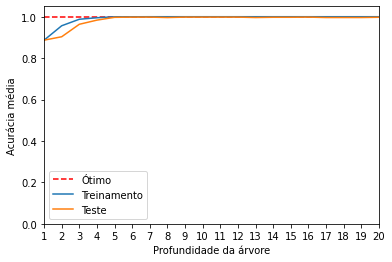

In [230]:
# plotando resultados
fig, ax = plt.subplots()
plt.axhline(y=1, color='r', linestyle='dashed', label="Ótimo")
plt.plot(depth_count, accuracy_training, label = "Treinamento")
plt.plot(depth_count, accuracy_testing, label = "Teste")
ax.set_ylabel("Acurácia média")
ax.set_xlabel("Profundidade da árvore")
plt.xlim([1, 20])
plt.ylim([0, 1.05])
plt.xticks(range(1, 21, 1))
plt.legend()
plt.show()